<a href="https://colab.research.google.com/github/MohamadSameerS/CODSOFT/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sales prediction

In [34]:
#importing the required dependensies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
#Reading the data Set
sale_data=pd.read_csv('advertising.csv')

getting some basic info of the data

In [5]:
sale_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
sale_data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
sale_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Dealing with Null values

In [10]:
#checking for null values
sale_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

it seems that there are no null values

lets get some insights by performing some visualization

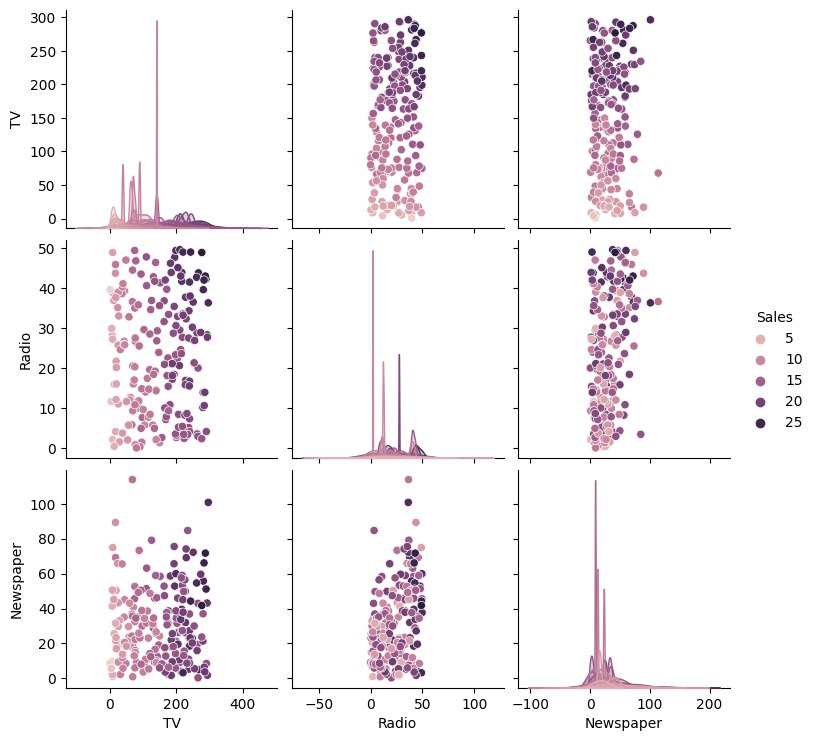

In [16]:
sns.pairplot(sale_data,hue='Sales')

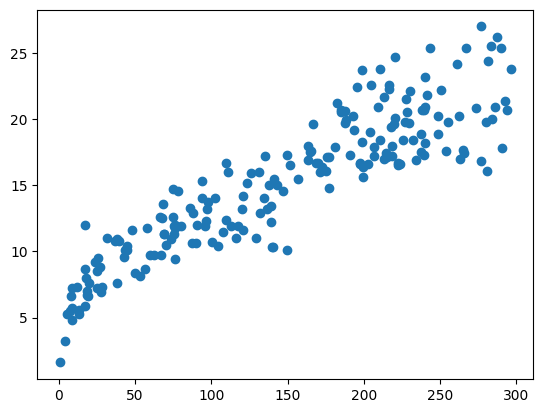

In [18]:
s1=sale_data['TV']
s2=sale_data['Sales']
s3=sale_data['Radio']
s4=sale_data['Newspaper']
plt.scatter(s1,s2)

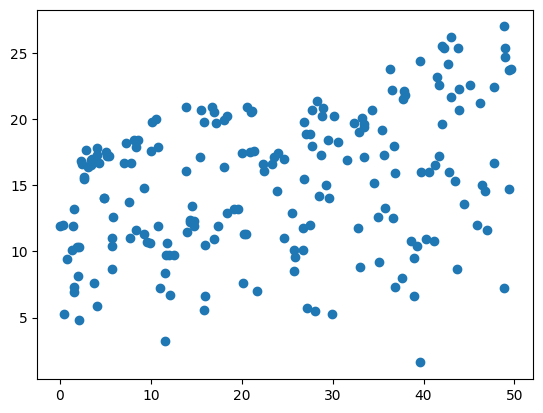

In [19]:
plt.scatter(s3,s2)

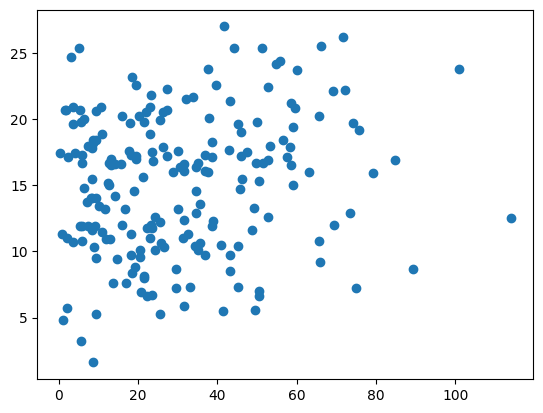

In [20]:
plt.scatter(s4,s2)

Splitting target and feature values

In [22]:
x=sale_data.drop(columns='Sales',axis=1)
y=sale_data['Sales']

splitting the data into training and testing data

In [44]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

In [45]:
print(x_train)

        TV  Radio  Newspaper
31   112.9   17.4       38.6
16    67.8   36.6      114.0
66    31.5   24.6        2.2
131  265.2    2.9       43.0
4    180.8   10.8       58.4
..     ...    ...        ...
35   290.7    4.1        8.5
102  280.2   10.1       21.4
38    43.1   26.7       35.1
151  121.0    8.4       48.7
105  137.9   46.4       59.0

[160 rows x 3 columns]


In [47]:
print(y_train)

31     11.9
16     12.5
66     11.0
131    17.7
4      17.9
       ... 
35     17.8
102    19.8
38     10.1
151    11.6
105    15.0
Name: Sales, Length: 160, dtype: float64


Model Building(Linear regression)

In [48]:
model=LinearRegression()

In [49]:
#fitting the model with training data
model.fit(x_train,y_train)

LinearRegression()

Evaluating the model

In [50]:
x_train_prediction=model.predict(x_train)

In [51]:
print(x_train_prediction)

[12.61356636 12.40528706  8.9037908  19.30925876 15.62157204  8.78850849
 22.6188777  12.22987277  9.75670227 15.80789965  8.87121543 10.02372749
  8.07771709 20.56372765 13.12785174 16.61386442 11.69926346 11.01824728
 18.04945008  7.69092842 19.01924191 18.1906501  21.32726596  9.80342029
 15.1438823   8.89613756 16.96421204 21.79230834 21.10091819 13.31698894
 18.88065657  5.22497382 12.25185363 14.62524113 10.84494785 17.33426581
 16.75456207 19.47814666 23.44593658 18.77326072 18.14295003 20.6214029
  7.069992   10.36280481 12.84135198 14.43323471 24.91845943 14.02087751
  9.14943739 15.72514686  9.30856403 16.4674872  20.78339292 17.79203061
 15.76813482  7.13748961 19.39984599  8.05321926 15.76235886 19.55078764
 10.37506832 15.50310841 20.16425793 18.7868653  21.16451926 11.88921781
 13.67636747 13.73245438  9.25206247 17.78715208 13.15291859  9.59404187
  8.53381468 18.05973931  7.35947239 17.99939046 19.20008766 10.53753193
 20.39724241 21.30527012 11.28955244 20.07966103 10.

In [52]:
#Calculating the r2_score
train_data_accuracy=r2_score(y_train,x_train_prediction)
print(train_data_accuracy)

0.8898610426111964


its nearer to 1. our model is ok

In [53]:
x_test_prediction=model.predict(x_test)
print(x_test_prediction)

[ 9.26845695 16.91238195 20.65522301 20.15459209  5.97195301  5.33666996
 20.85579747 14.45308297 17.77549077 21.08948404 14.97276021  8.00291074
  9.49942693  8.7910574  10.15728489 15.18628884 10.65217931 12.35919673
 21.54451839 18.71488352 23.10842647  8.25516019  9.88406004 23.42964708
  8.76236023 10.58771282 12.49890535 23.56000326  9.70634289 12.22643557
 17.15503573 10.88863672 24.18602564 22.23195091 14.6735241  20.82708633
  7.93278598 24.73685477 21.40318873 13.1905683 ]


In [54]:
test_data_accuracy=r2_score(y_test,x_test_prediction)
print(test_data_accuracy)

0.9383677100694414


almost nearer to 1

predictive model

In [56]:
#input_data=( 109.8,47.8,51.4)
#input_data=(94.2,4.9,8.1)
input_data=(38.2,3.7,13.8)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[7.02955991]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


therefore our model predicted the values in nearly perfect manner and its ok